In [1]:
#!pip3 install torchtext

In [2]:
import torch
import torch.nn as nn
import torchtext.data as ttd
from torchtext.vocab import GloVe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# Unfortunately this URL doesn't work directly with pd.read_csv
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

File ‘spam.csv’ already there; not retrieving.



In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# rename columns to something better
df.columns = ['labels', 'data']

In [9]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})

In [11]:
df2 = df[['data', 'b_labels']]

In [12]:
df2.head()

,data,b_labels
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [13]:
df2.to_csv('spam2.csv', index=False)

In [15]:
TEXT = ttd.Field(
    sequential=True,
    batch_first=True,
    lower=False,
    #tokenize='spacy',
    pad_first=True)
LABEL = ttd.Field(sequential=False, use_vocab=False, is_target=True)

# Note: if you don't specify use_vocab=False, then PyTorch will
# complain later when you try to iterate over the dataset that
# the attribute `vocab` doesn't exist.

# Note 2: if you don't specify is_target=True, then PyTorch will
# assume it's part of the input, so when you iterate over the
# dataset it will be like:
# for (inputs, targets), _ in iterator:
# where the 2nd element (_) should have been the target.

dataset = ttd.TabularDataset(
    path='spam2.csv',
    format='csv',
    skip_header=True,
    fields=[('data', TEXT), ('label', LABEL)]
)

/Users/Z0094BV/miniconda3/lib/python3.9/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
/Users/Z0094BV/miniconda3/lib/python3.9/site-packages/torchtext/data/example.py:68: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.', UserWarning)
/Users/Z0094BV/miniconda3/lib/python3.9/site-packages/torchtext/data/example.py:78: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent 

In [16]:
train_dataset, test_dataset = dataset.split() # default is 0.7

In [17]:
TEXT.build_vocab(train_dataset,)

In [18]:
vocab = TEXT.vocab

In [19]:
vocab.stoi

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x7f856133a490>>,
            {'<unk>': 0,
             '<pad>': 1,
             'to': 2,
             'you': 3,
             'I': 4,
             'a': 5,
             'the': 6,
             'and': 7,
             'in': 8,
             'is': 9,
             'i': 10,
             'u': 11,
             'for': 12,
             'my': 13,
             'of': 14,
             'me': 15,
             'your': 16,
             'on': 17,
             'have': 18,
             '2': 19,
             'that': 20,
             'are': 21,
             'it': 22,
             'or': 23,
             'at': 24,
             'call': 25,
             'be': 26,
             'with': 27,
             'not': 28,
             'will': 29,
             'can': 30,
             'U': 31,
             'get': 32,
             'so': 33,
             'ur': 34,
             '&lt;#&gt;': 35,
             'but': 36,
             "I'm": 37,
  

In [20]:
vocab.itos

['<unk>',
 '<pad>',
 'to',
 'you',
 'I',
 'a',
 'the',
 'and',
 'in',
 'is',
 'i',
 'u',
 'for',
 'my',
 'of',
 'me',
 'your',
 'on',
 'have',
 '2',
 'that',
 'are',
 'it',
 'or',
 'at',
 'call',
 'be',
 'with',
 'not',
 'will',
 'can',
 'U',
 'get',
 'so',
 'ur',
 '&lt;#&gt;',
 'but',
 "I'm",
 'from',
 'You',
 '4',
 'go',
 'up',
 'we',
 'if',
 'just',
 'when',
 'know',
 'do',
 'like',
 'was',
 'got',
 'this',
 '.',
 'all',
 'now',
 'out',
 '?',
 'am',
 'come',
 'Call',
 'want',
 '...',
 'then',
 'time',
 'by',
 'n',
 "I'll",
 'going',
 'only',
 'send',
 'about',
 'he',
 'no',
 'text',
 'need',
 'as',
 'still',
 'what',
 'How',
 'If',
 'one',
 'But',
 'We',
 'there',
 'our',
 'r',
 'been',
 'Just',
 'its',
 'Do',
 'No',
 'So',
 'some',
 'back',
 'good',
 'think',
 'any',
 'love',
 'Ì_',
 'A',
 "don't",
 'an',
 'tell',
 'has',
 'see',
 'her',
 '&',
 'Your',
 'home',
 'mobile',
 'My',
 'day',
 'how',
 'What',
 'free',
 "i'm",
 'take',
 'The',
 'dont',
 'phone',
 'who',
 'Ok',
 'd',
 'mak

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [22]:
train_iter, test_iter = ttd.Iterator.splits(
        (train_dataset, test_dataset), sort_key=lambda x: len(x.data),
        batch_sizes=(32, 256), device=device)

/Users/Z0094BV/miniconda3/lib/python3.9/site-packages/torchtext/data/iterator.py:48: UserWarning: Iterator class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [23]:
for inputs, targets in train_iter:
  print("inputs:", inputs, "shape:", inputs.shape)
  print("targets:", targets, "shape:", targets.shape)
  break

inputs: tensor([[    1,     1,     1,  ...,    84,   222,   348],
        [    1,     1,     1,  ...,  1518,    13,  9550],
        [    1,     1,     1,  ...,  3693,    11,  4242],
        ...,
        [    1,     1,     1,  ...,     2,    26, 10412],
        [    1,     1,     1,  ...,  4542,   939,   803],
        [    1,     1,     1,  ...,    15,   191, 11364]]) shape: torch.Size([32, 37])
targets: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0]) shape: torch.Size([32])


/Users/Z0094BV/miniconda3/lib/python3.9/site-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [24]:
for inputs, targets in test_iter:
  print("inputs:", inputs)
  print("targets:", targets)
  break

inputs: tensor([[ 239,  814,   31,   30, 2096,  129],
        [ 755,  105,    3,    8,    5,  326],
        [   0,  250,   15,   46,  336,  146],
        ...,
        [   1,    1,    1,    1,    1,    0],
        [   1,    1,    1,    1,    1, 6830],
        [   1,    1,    1,    1,    1, 1238]])
targets: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [25]:
# Define the model
class RNN(nn.Module):
  def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs):
    super(RNN, self).__init__()
    self.V = n_vocab
    self.D = embed_dim
    self.M = n_hidden
    self.K = n_outputs
    self.L = n_rnnlayers

    self.embed = nn.Embedding(self.V, self.D)
    self.rnn = nn.LSTM(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        batch_first=True)
    self.fc = nn.Linear(self.M, self.K)
  
  def forward(self, X):
    # initial hidden states
    h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    c0 = torch.zeros(self.L, X.size(0), self.M).to(device)

    # embedding layer
    # turns word indexes into word vectors
    out = self.embed(X)

    # get RNN unit output
    out, _ = self.rnn(out, (h0, c0))

    # max pool
    out, _ = torch.max(out, 1)

    # we only want h(T) at the final time step
    out = self.fc(out)
    return out

In [26]:
model = RNN(len(vocab), 20, 15, 1, 1)
model.to(device)

RNN(
  (embed): Embedding(12669, 20)
  (rnn): LSTM(20, 15, batch_first=True)
  (fc): Linear(in_features=15, out_features=1, bias=True)
)

In [27]:
# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [28]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_iter, test_iter, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_iter:
      # print("inputs.shape:", inputs.shape, "targets.shape:", targets.shape)
      targets = targets.view(-1, 1).float()
      # move data to GPU
      # inputs, targets = inputs.to(device), targets.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)
        
      # Backward and optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    # Get train loss and test loss
    train_loss = np.mean(train_loss) # a little misleading
    
    test_loss = []
    for inputs, targets in test_iter:
      # inputs, targets = inputs.to(device), targets.to(device)
      targets = targets.view(-1, 1).float()
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss
    
    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')
  
  return train_losses, test_losses

In [29]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, train_iter, test_iter, 20)

Epoch 1/20, Train Loss: 0.5093,       Test Loss: 0.4173, Duration: 0:00:01.900108
Epoch 2/20, Train Loss: 0.3400,       Test Loss: 0.3417, Duration: 0:00:02.160430
Epoch 3/20, Train Loss: 0.2598,       Test Loss: 0.2730, Duration: 0:00:01.949539
Epoch 4/20, Train Loss: 0.1973,       Test Loss: 0.2297, Duration: 0:00:01.971349
Epoch 5/20, Train Loss: 0.1492,       Test Loss: 0.1988, Duration: 0:00:01.885552
Epoch 6/20, Train Loss: 0.1189,       Test Loss: 0.1817, Duration: 0:00:02.075600
Epoch 7/20, Train Loss: 0.0930,       Test Loss: 0.1676, Duration: 0:00:01.878933
Epoch 8/20, Train Loss: 0.0747,       Test Loss: 0.1573, Duration: 0:00:01.942461
Epoch 9/20, Train Loss: 0.0624,       Test Loss: 0.1518, Duration: 0:00:01.877899
Epoch 10/20, Train Loss: 0.0484,       Test Loss: 0.1448, Duration: 0:00:01.959573
Epoch 11/20, Train Loss: 0.0404,       Test Loss: 0.1477, Duration: 0:00:01.968456
Epoch 12/20, Train Loss: 0.0331,       Test Loss: 0.1361, Duration: 0:00:02.394579
Epoch 13/20, 

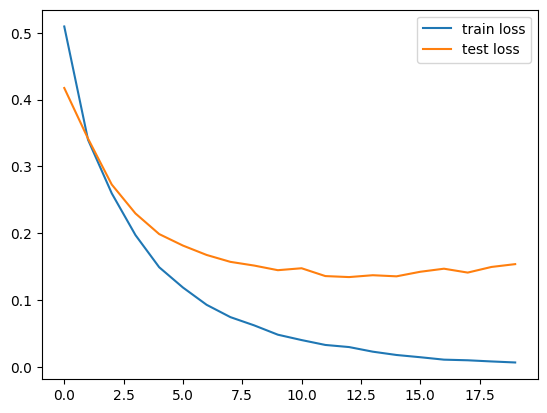

In [30]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [31]:
# Accuracy

p_train = []
y_train = []
for inputs, targets in train_iter:
  targets = targets.view(-1, 1).float()

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  predictions = list((outputs > 0).cpu().numpy())
  
  # Store predictions
  p_train += predictions
  y_train += list(targets.cpu().numpy())

p_train = np.array(p_train)
y_train = np.array(y_train)
train_acc = np.mean(y_train == p_train)


p_test = []
y_test = []
for inputs, targets in test_iter:
  targets = targets.view(-1, 1).float()

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  predictions = list((outputs > 0).cpu().numpy())
  
  # Store predictions
  p_test += predictions
  y_test += list(targets.cpu().numpy())

p_test = np.array(p_test)
y_test = np.array(y_test)
test_acc = np.mean(y_test == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9987, Test acc: 0.9635


In [32]:
df[df['labels'] == 'spam'].size / df.size

0.13406317300789664

In [33]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization
[[1443   20]
 [  41  168]]


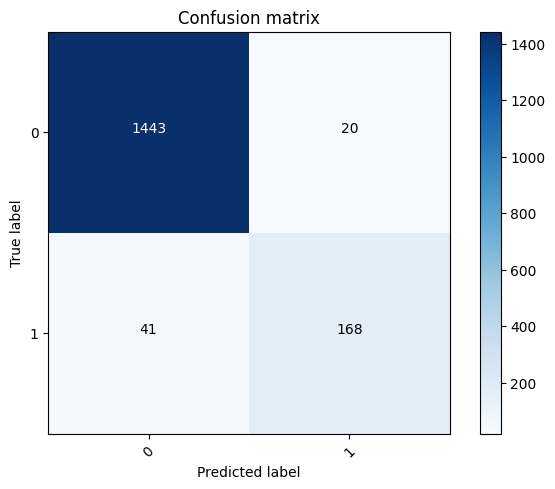

In [34]:
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, [0, 1])

Confusion matrix, without normalization
[[3359    3]
 [   2  536]]


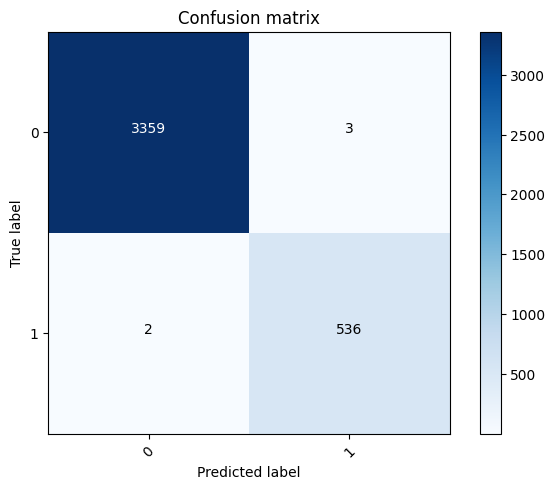

In [35]:
cm = confusion_matrix(y_train, p_train)
plot_confusion_matrix(cm, [0, 1])

In [36]:
### Make predictions ###

# get some random test data
df[df.labels == 'spam'].sample(3)

,labels,data,b_labels
4983,spam,goldviking (29/M) is inviting you to be his fr...,1
4197,spam,Want to funk up ur fone with a weekly new tone...,1
4045,spam,Win a å£1000 cash prize or a prize worth å£5000,1


In [37]:
small_sample = df[df.labels == 'spam'].sample(3)
with open('sample_test.csv', 'w') as f:
  f.write("data\n") # header
  for i, row in small_sample.iterrows():
    f.write(row['data'] + "\n")

In [38]:
!cat sample_test.csv

data
This is the 2nd time we have tried 2 contact u. U have won the 750 Pound prize. 2 claim is easy, call 08718726970 NOW! Only 10p per min. BT-national-rate 
UR awarded a City Break and could WIN a å£200 Summer Shopping spree every WK. Txt STORE to 88039.SkilGme.TsCs087147403231Winawk!Age16+å£1.50perWKsub
For sale - arsenal dartboard. Good condition but no doubles or trebles!


In [39]:
sample_dataset = ttd.TabularDataset(
    path='sample_test.csv',
    format='csv',
    skip_header=True,
    fields=[('data', TEXT)]
)

/Users/Z0094BV/miniconda3/lib/python3.9/site-packages/torchtext/data/example.py:68: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.', UserWarning)
/Users/Z0094BV/miniconda3/lib/python3.9/site-packages/torchtext/data/example.py:78: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.', UserWarning)


In [40]:
sample_iter = ttd.Iterator(
    sample_dataset,
    batch_size=32,
    sort_key=lambda x: len(x.data),
    device=device)

/Users/Z0094BV/miniconda3/lib/python3.9/site-packages/torchtext/data/iterator.py:48: UserWarning: Iterator class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [41]:
for inputs in sample_iter:
  # Returns a Batch object, not tensor
  print("inputs:", inputs)

  # Forward pass
  outputs = model(inputs.data)

  # Print logits
  print(outputs)

inputs: 
[torchtext.data.batch.Batch of size 3]
	[.data]:[torch.LongTensor of size 3x22]
tensor([[1.2547],
        [4.5030],
        [4.7399]], grad_fn=<AddmmBackward>)


/Users/Z0094BV/miniconda3/lib/python3.9/site-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [42]:
single_sentence = 'Our dating service has been asked 2 contact U by someone shy! CALL 09058091870 NOW all will be revealed.'


In [43]:
TEXT.preprocess(single_sentence)

['Our',
 'dating',
 'service',
 'has',
 'been',
 'asked',
 '2',
 'contact',
 'U',
 'by',
 'someone',
 'shy!',
 'CALL',
 '09058091870',
 'NOW',
 'all',
 'will',
 'be',
 'revealed.']

In [44]:
TEXT.numericalize([TEXT.preprocess(single_sentence)])

tensor([[ 1070,   792,   268,   104,    87,   551,    19,   150,    31,    65,
           300, 11516,   401,  5033,   451,    54,    29,    26,  2049]])

In [45]:
toks = TEXT.preprocess(single_sentence)
sent_idx = TEXT.numericalize([toks])
model(sent_idx.to(device))

tensor([[5.2435]], grad_fn=<AddmmBackward>)

Check out my other notebook which uses the Keras API for text preprocessing. It achieves better accuracy and the API is more convenient / consistent in my opinion.

https://colab.research.google.com/drive/1RC6CVAXkyHjr4prvkbVpMFM5UBJJ2ZGH